In [1]:
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
import scipy.io
import scipy.misc
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
seed = 7
cross_fold = 5
scoring = 'roc_auc' # scoring parameter
# warnings.filterwarnings('ignore')

In [2]:
def trainAndTestModel(model_name,model,X_train,Y_train, x_test,y_test):
    model.fit(X_train, Y_train)
    # mse = mean_squared_error(Y_test,model.predict(X_test))
    # print(f"{model_name}: Mean Squared Error (MSE) = {mse}")
    try:
        print(f"{model_name}: Score (roc_auc) = {model.score(X_train, Y_train)}, Best Parameters= {model.best_params_}")
    except:
        print(f"{model_name}: Score (roc_auc) = {model.score(X_train, Y_train)}") 

    print(f"{model_name}: Test Score (roc_auc) = {model.score(x_test,y_test)} ")   

    print(classification_report(y_true=y_test,y_pred=model.predict(x_test))) 
    plot_confusion_matrix(model, x_test, y_test) 
    plt.show() 
    return model

In [3]:
cols = ["username",	"name",	"location",	"bio",	"website",	"birthday"]

dfx = pd.read_csv("dataset.csv",usecols=cols)
dfy = pd.read_csv("dataset.csv",usecols=["Label"])
x_features = dfx.values
y_labels = dfy.values
x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels, test_size=0.33, random_state=seed, stratify=y_labels)




Feature ranking:
1. feature 4 (0.638393)
2. feature 3 (0.298219)
3. feature 2 (0.027026)
4. feature 0 (0.019708)
5. feature 5 (0.009920)
6. feature 1 (0.006734)


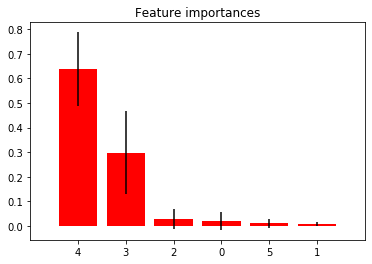

Indices of features  : [4 3 2 0 5 1]


In [4]:
num_trees = 64
# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_estimators= 24,random_state=seed)
# forest = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
# RandomForestClassifier(n_estimators=num_trees,random_state=seed, max_depth = 3, min_samples_leaf=4)
forest.fit(x_train, np.ravel(y_train))
importances = forest.feature_importances_
# print(importances)
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()
print("Indices of features  :",indices)

ExtraTreesClassifier: Score (roc_auc) = 0.9996392617449664, Best Parameters= {'criterion': 'entropy', 'n_estimators': 8, 'random_state': 42}
ExtraTreesClassifier: Test Score (roc_auc) = 0.9323071601521964 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       295
           1       0.98      0.82      0.89        49

    accuracy                           0.97       344
   macro avg       0.97      0.91      0.94       344
weighted avg       0.97      0.97      0.97       344



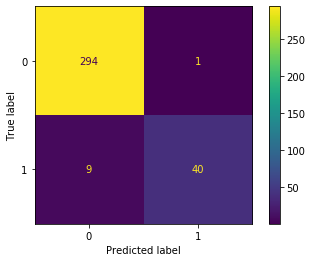

In [5]:
from sklearn import ensemble
param_grid  = {'n_estimators': [2,4,8,16,32,64,128,256,400], 'criterion':["gini", "entropy"], 'random_state': [42]}
grid_er1 = GridSearchCV(estimator=ensemble.ExtraTreesClassifier(),param_grid =param_grid ,cv=cross_fold,scoring=scoring,n_jobs= -1)
model_name = "ExtraTreesClassifier"
m = trainAndTestModel(f"{model_name}", grid_er1, x_train, y_train, x_test,y_test)

RandoForestClassifier: Score (roc_auc) = 0.9988674496644295, Best Parameters= {'criterion': 'gini', 'n_estimators': 8, 'random_state': 42}
RandoForestClassifier: Test Score (roc_auc) = 0.9539951573849879 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       295
           1       0.98      0.82      0.89        49

    accuracy                           0.97       344
   macro avg       0.97      0.91      0.94       344
weighted avg       0.97      0.97      0.97       344



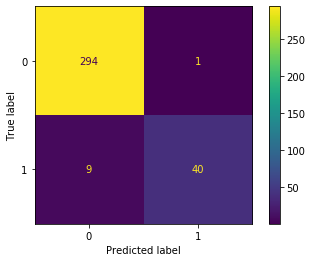

In [6]:
param_grid  = {'n_estimators': [2,4,8,16,32,64,128,256,400], 'criterion':["gini", "entropy"], 'random_state': [42]}
grid_er1 = GridSearchCV(estimator=ensemble.RandomForestClassifier(),param_grid =param_grid ,cv=cross_fold,scoring=scoring,n_jobs= -1)
model_name = "RandoForestClassifier"
m = trainAndTestModel(f"{model_name}", grid_er1, x_train, y_train, x_test,y_test)

GradientBoostingClassifier: Score (roc_auc) = 0.9745302013422819, Best Parameters= {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'n_estimators': 8, 'random_state': 42}
GradientBoostingClassifier: Test Score (roc_auc) = 0.9745416810792114 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       295
           1       1.00      0.71      0.83        49

    accuracy                           0.96       344
   macro avg       0.98      0.86      0.91       344
weighted avg       0.96      0.96      0.96       344



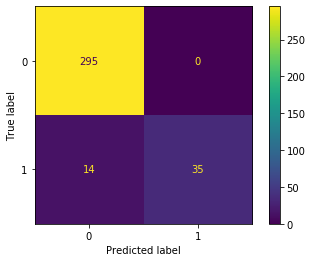

In [7]:
param_grid  = {'n_estimators': [2,4,8,16,32,64,128,256,400],  'learning_rate':[0.001,0.01,0.1,1,1.5,2] , 'criterion':['friedman_mse', 'mse', 'mae'], 'random_state': [42]}
grid_er1 = GridSearchCV(estimator=ensemble.GradientBoostingClassifier(),param_grid =param_grid ,cv=cross_fold,scoring=scoring,n_jobs= -1)
model_name = "GradientBoostingClassifier"
m = trainAndTestModel(f"{model_name}", grid_er1, x_train, y_train, x_test,y_test)

AdaBoostClassifier: Score (roc_auc) = 0.9776510067114095, Best Parameters= {'learning_rate': 0.01, 'n_estimators': 400, 'random_state': 42}
AdaBoostClassifier: Test Score (roc_auc) = 0.9742649602213767 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       295
           1       1.00      0.84      0.91        49

    accuracy                           0.98       344
   macro avg       0.99      0.92      0.95       344
weighted avg       0.98      0.98      0.98       344



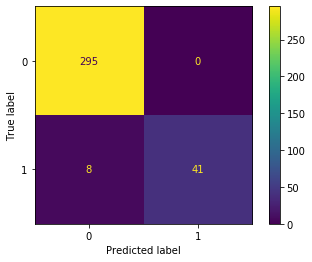

In [8]:
param_grid  = {'n_estimators': [2,4,8,16,32,64,128,256,400], 'learning_rate':[0.001,0.01,0.1,0.2] ,  'random_state': [42]}
grid_er1 = GridSearchCV(estimator=ensemble.AdaBoostClassifier(),param_grid =param_grid ,cv=cross_fold,scoring=scoring,n_jobs= -1)
model_name = "AdaBoostClassifier"
m = trainAndTestModel(f"{model_name}", grid_er1, x_train, y_train, x_test,y_test)

BaggingClassifier: Score (roc_auc) = 0.9987164429530202, Best Parameters= {'n_estimators': 8, 'random_state': 42}
BaggingClassifier: Test Score (roc_auc) = 0.9548253199584917 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       295
           1       0.98      0.82      0.89        49

    accuracy                           0.97       344
   macro avg       0.97      0.91      0.94       344
weighted avg       0.97      0.97      0.97       344



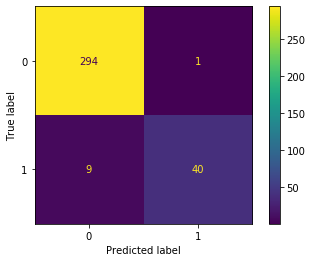

In [9]:
param_grid  = {'n_estimators': [2,4,8,16,32,64,128,256,400], 'random_state': [42]}
grid_er1 = GridSearchCV(estimator=ensemble.BaggingClassifier(),param_grid =param_grid ,cv=cross_fold,scoring=scoring,n_jobs= -1)
model_name = "BaggingClassifier"
m = trainAndTestModel(f"{model_name}", grid_er1, x_train, y_train, x_test,y_test)

In [10]:
# Prediction example
f = np.array([0, 0, 0, 0, 0, 0])
ans = m.predict_proba(f.reshape((1, -1)))
print(ans[0])

[0.88616071 0.11383929]
